# Kaggle Bike Sharng Demand

![](https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png)

- 캐글:[Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)


- datetime: 시간별 날짜 : 년,월,일,시,분,초
- season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
- holiday: 공휴일 또는 주말
- workingday: 주말,공휴일제외 일하는날
- weather
    - 1: 매우 맑음(Clear, Few clouds, Partly cloudy, Partly cloudy)
    - 2: 맑음(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
    - 3: 나쁨(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
    - 4: 매우 나쁨(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
- temp: 기온
- atemp: 체감온도
- humidity: 습도
- windspeed: 풍속
- casual: 미등록 사용자 대여량 수
- registered: 등록된 사용자 대여량 수
- count: 대여량 총 합

## 1. 라이브러리 및 데이터
## 1-1. Library & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')
# 한글폰트
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


In [2]:
train = pd.read_csv('data/train.csv', parse_dates=["datetime"])

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 데이터 크기
10886행과 12개의 컬럼을 있는것을 확인 할 수 있다.

In [4]:
train.shape

(10886, 12)

### 컬럼별 자료형

컬럼별 자료형은 다음과 같다. datetime은 날짜형이고 나머지는 각각 int64, float64로 표현되어 있음을 알 수 있다.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

- 평균 : 20.23086도
- 표준편차 : 7.79159도


### 결측치 파악

null인 데이터는 없는거로 확인완료.

In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### 결측치 시각화 

결측치 시각화는 missingno의 msno를 사용한다. 

In [8]:
import missingno as msno # null 확인하는 시각화 툴

<AxesSubplot:>

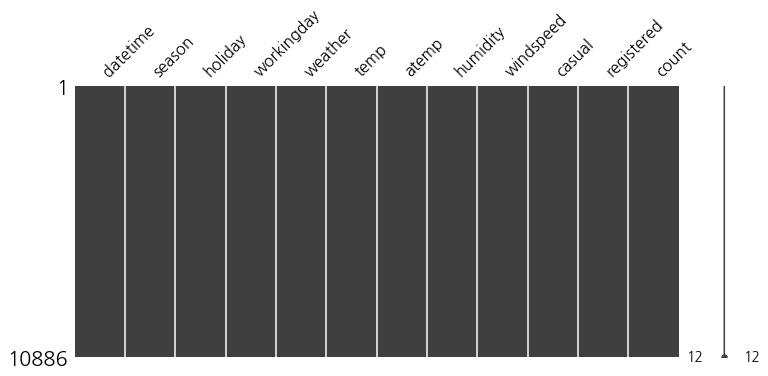

In [9]:
msno.matrix(train, figsize=(12,5))

## 데이터 전처리

datetime을 나누어 year(년),month(월),day(일),hour(시),minute(분),second(초)로 칼럼에 추가해주자.

In [10]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

### 데이터 크기
10886의 행과 18개의 컬럼이 된걸 확인할수 있다.

In [11]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## 3.데이터 시각화

#### 연도별, 월별, 일별, 시간별 대여량

그래프를 확인해보자.
- 연도별 대여량을 보면 2012년이 대여량이 많은걸 확인 할 수 있다.
- 월별 대여량을 보면 6월이 가장 많고 1월이 가장 적은걸 확인 할 수 있다. 5~10월 계절로보면 여름,가을에 많이 대여를 많이 하는것 같다.
- 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안 된다.
- 시간별 대여량을 보면 출퇴근시간에 많은 것 같다. 문제는 주말,공휴일등 나누어서 봐야 할거같다.

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

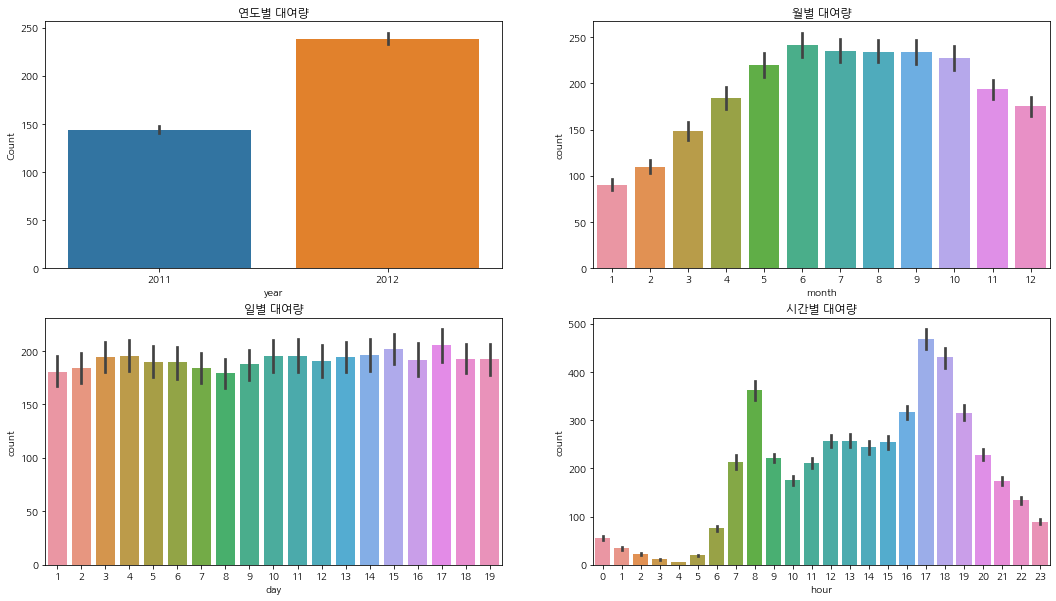

In [12]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,10)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")

### Boxplot

대여량, 계절별 대여량, 시간별 대여량, 근무일 여부에 따른 대여량 정보의 Boxplot을 보.

- 대여량을 보았을때 특정 구간에 몰려 있는것을 볼 수 있다.
- 계절별 대여량을 보면 가을이 제일 많고 여름 > 겨울 > 봄 순으로 볼 수 있다.
- 시간별 대여량은 역시 출퇴근 시간에 많은 대여량을 확인 할 수 있다.
- 근무일과 휴일 대여량을 보면 휴일에 조금더 많은 대여량을 확인 할 수 있다.

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

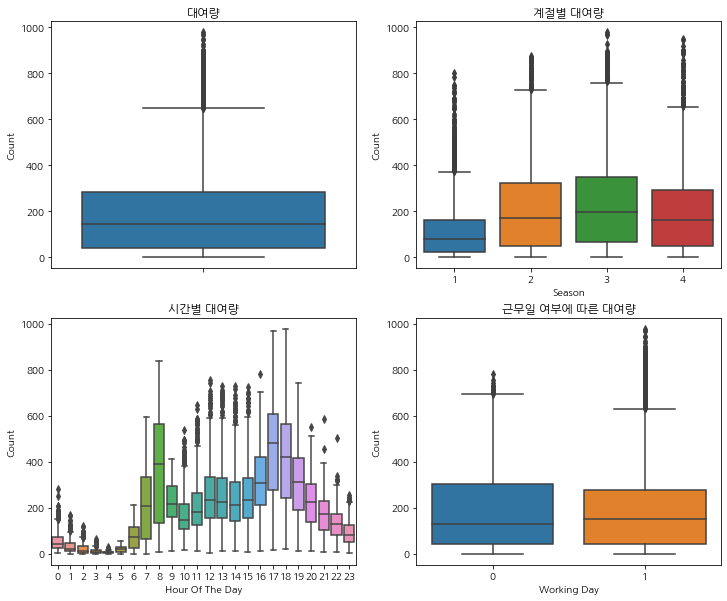

In [13]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="대여량")
axes[0][1].set(xlabel='Season', ylabel='Count',title="계절별 대여량")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="시간별 대여량")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="근무일 여부에 따른 대여량")

### 데이터 전처리
dayofweek도 나누어 칼럼에 추가해주도록 하자.

In [14]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [15]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

위 요일별 대여량을 보면 대여량은 크게 차이는 없는거로 보인다.

###  pointplot
- 시간대별 대여량을 보면 역시 출퇴근 시간에 많은 대여량을 보이고 있다.
- 근무하는날은 출퇴근 시간때 대여량이 많고 휴일에는 12시 ~ 16시에 가장 많은 대여량을 볼 수 있다. 
- 요일별 대여량은 근무하는날,휴일 그래프와 크게 다를게 없어보인다. 평일 출퇴근시간,휴일 점심이후로 대여량이 많은걸 볼 수 있다.
- 날씨별 대여량은 역시나 맑을때 대여량이 좋은걸 확인할 수 있다. 매우나쁨(비,눈,..등등) 일때는 자전거를 탈수가 없으니 현저히 적다.
- 계절별 대여량은 가을,여름,겨울 대여량과 봄 대여량 차이가 많이 나는걸 볼 수 있다.

[Text(0.5, 1.0, '계절별 대여량')]

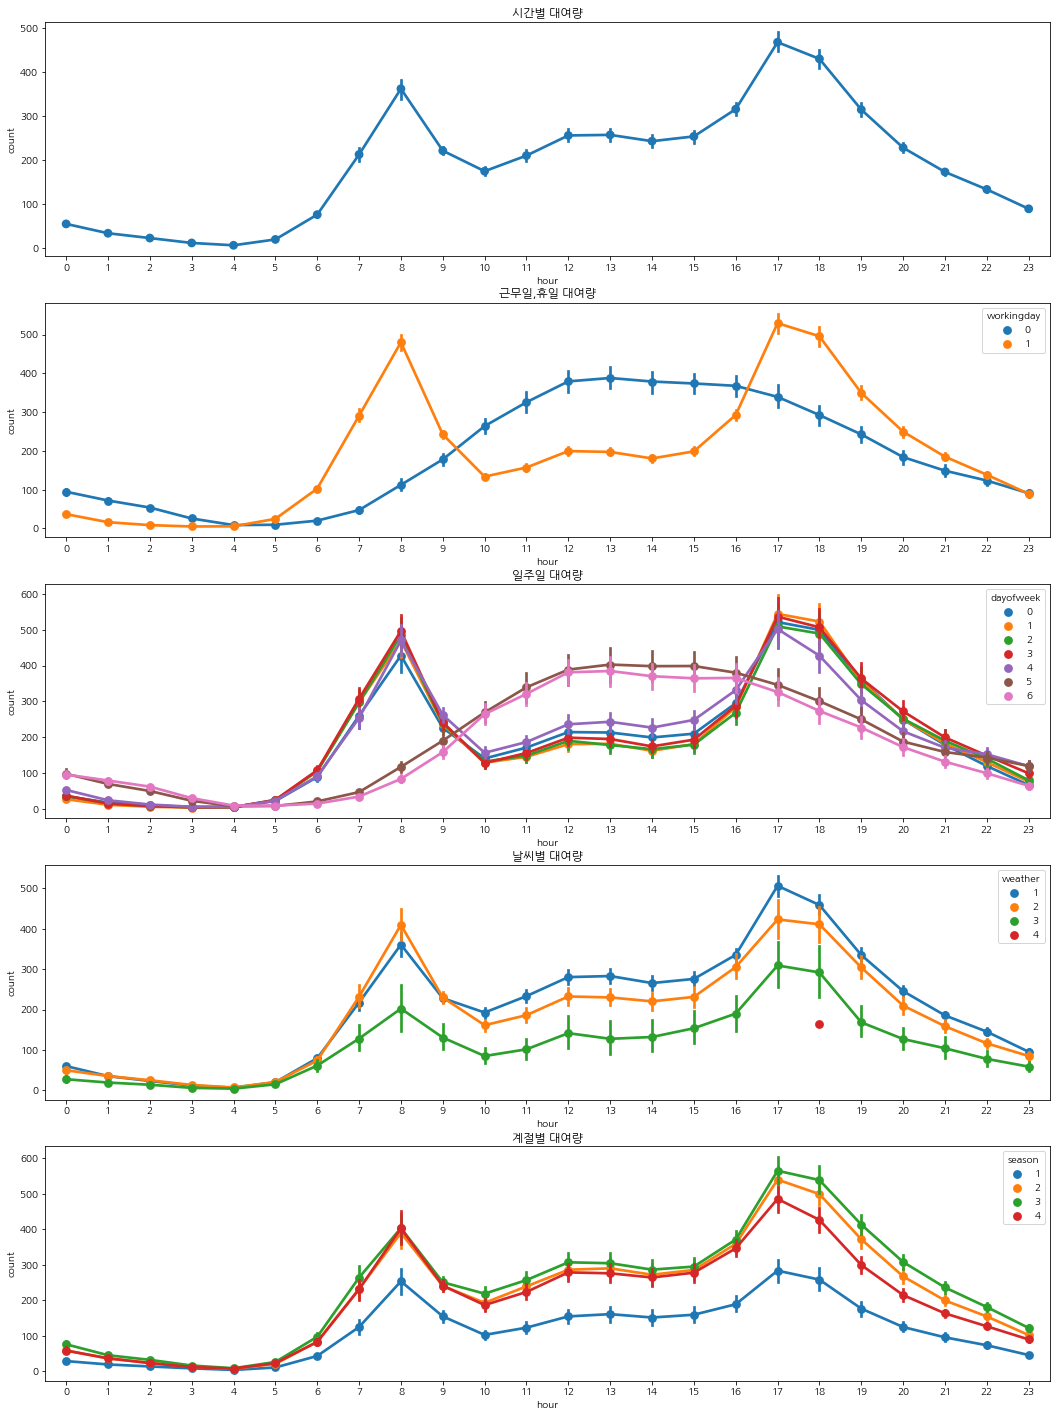

In [16]:
 fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)

sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)
ax1.set(title="시간별 대여량")
ax2.set(title="근무일,휴일 대여량")
ax3.set(title="일주일 대여량")
ax4.set(title="날씨별 대여량")
ax5.set(title="계절별 대여량")

## heatmap

In [17]:
corrMatt  = train[["temp","atemp","casual","registered","humidity","windspeed","count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<AxesSubplot:>

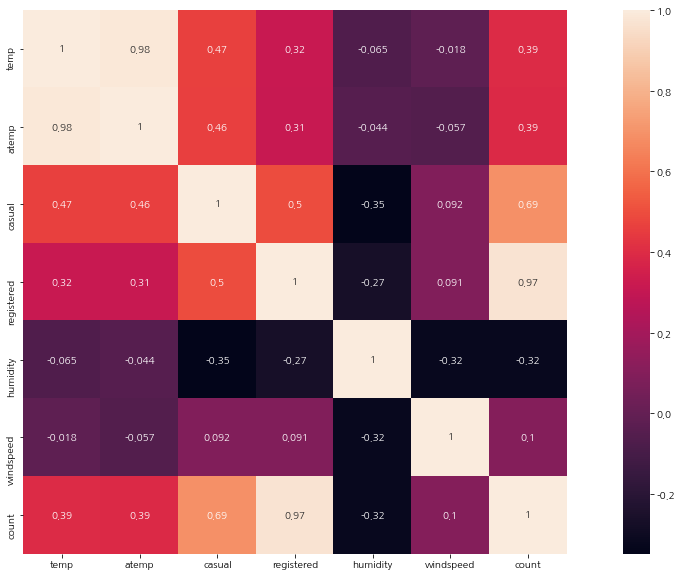

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, square=True,annot=True)

## regplot
- 풍속의 경우 0에 숫자가 몰려 있는 것으로 보인다. 아마도 관측되지 않은 수치에 0으로 기록한 것이 아닐까 추측한다.
- alpha함수는 투명도(0~1) 설정 하는 함수이다. 많이 겹치는 부분을 확인하기 위해 설정해주었다.

<AxesSubplot:xlabel='humidity', ylabel='count'>

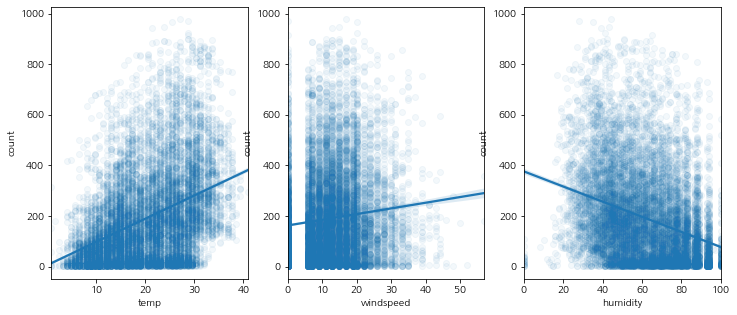

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="temp", y="count", data=train,ax=ax1, scatter_kws={'alpha':0.05}) 
sns.regplot(x="windspeed", y="count", data=train,ax=ax2, scatter_kws={'alpha':0.05})
sns.regplot(x="humidity", y="count", data=train, ax=ax3, scatter_kws={'alpha':0.05})

년도월별 데이터를 확인하기위해 합쳐서 컬럼을 하나더 만들어 주었다.

In [20]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month) # 년과 월을 붙여서 칼럼을 만들어주자.

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


year_month 칼럼이 추가 되었다.

## year_month 시각화
- 2011년 보다 2012년 대여량은 많은건 확인했으며, 여름과가을에 대여량도 11년 ~ 12년에 많은걸 확인 할수 있다. 2011년부터 대여량이 증가하는것을 확인 할 수 있다.

<AxesSubplot:xlabel='year_month', ylabel='count'>

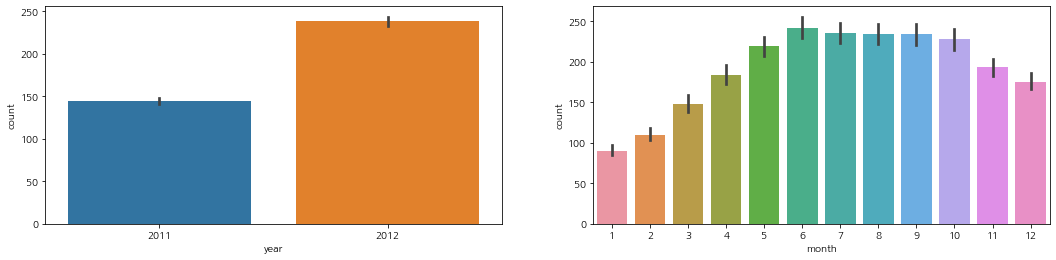

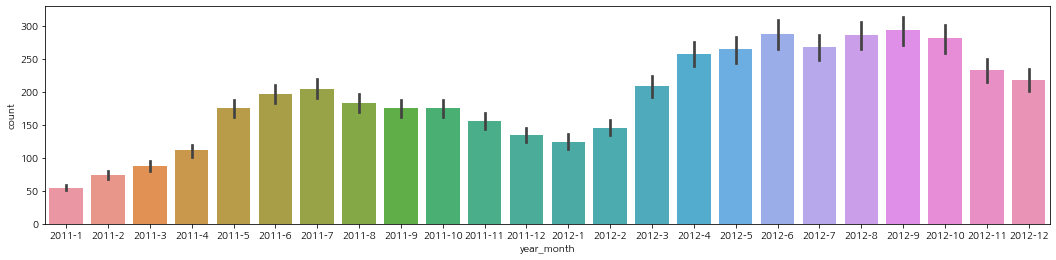

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year_month", y="count", ax=ax3)

## Outliers 이상치 제거
0에 몰려있는 데이터와 끝에 몰려있는 데이터를 제거하고 보도록 하자.

In [22]:
# trainWithoutOutliers
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


데이터가 147개 제거된것을 볼 수 있다.

## distplot,probplot

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.348699012122978, 4.562423868087808, 0.9581176780909615))

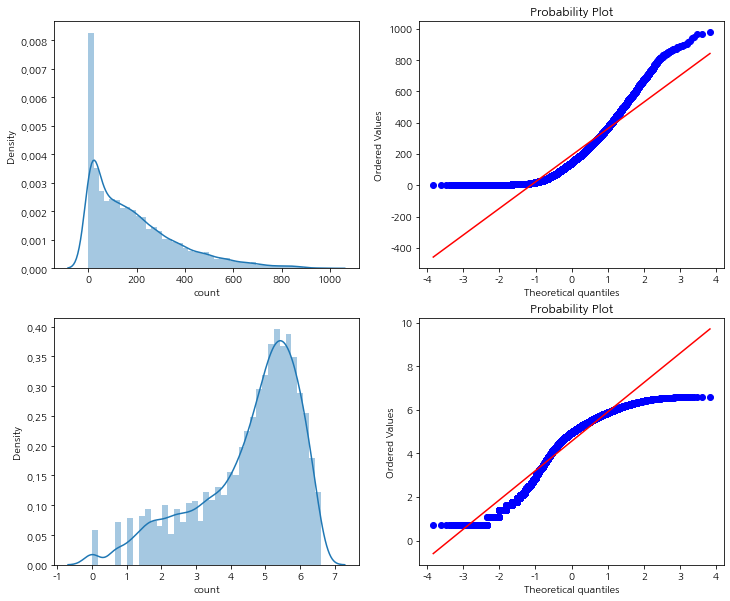

In [23]:
# count값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

- outlier data를 제거하기전 0에 많이 분포하고 있는것을 볼 수 있다.
- count변수가 오른쪽에 치우쳐저있다. 대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 "count"변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만 이전 그래프보다는 좀 더 자세히 표현하고 있다.

## 4.Feature Engineering

### 1. 라이브러리 및 데이터
Library & Data

In [24]:
train = pd.read_csv('data/train.csv', parse_dates=["datetime"])
train.shape

(10886, 12)

In [25]:
test = pd.read_csv('data/test.csv', parse_dates=["datetime"])
test.shape

(6493, 9)

## 데이터 전처리

datetime을 나누어 year(년),month(월),day(일),hour(시),minute(분),second(초),dayofweek(요일)로 칼럼에 추가해주자.

In [26]:
train.shape

(10886, 12)

In [27]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

train 데이터 칼럼이 12개에서 19개로 늘어난걸 확인 할 수 있다.

In [28]:
test.shape

(6493, 9)

In [29]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

test 데이터 칼럼도 9개에서 16개로 늘어난걸 확인 하자.

### countplot
- 풍속을 시각화 해보았다. train,test셋 둘다 0에 데이터에 많이 몰려있는데 측정되지 않은 데이터를 0으로 넣어준거 같다. 
- 두 그래프를 보면 역시나 풍속이 낮을수록 대여량이 많은것 같다.

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

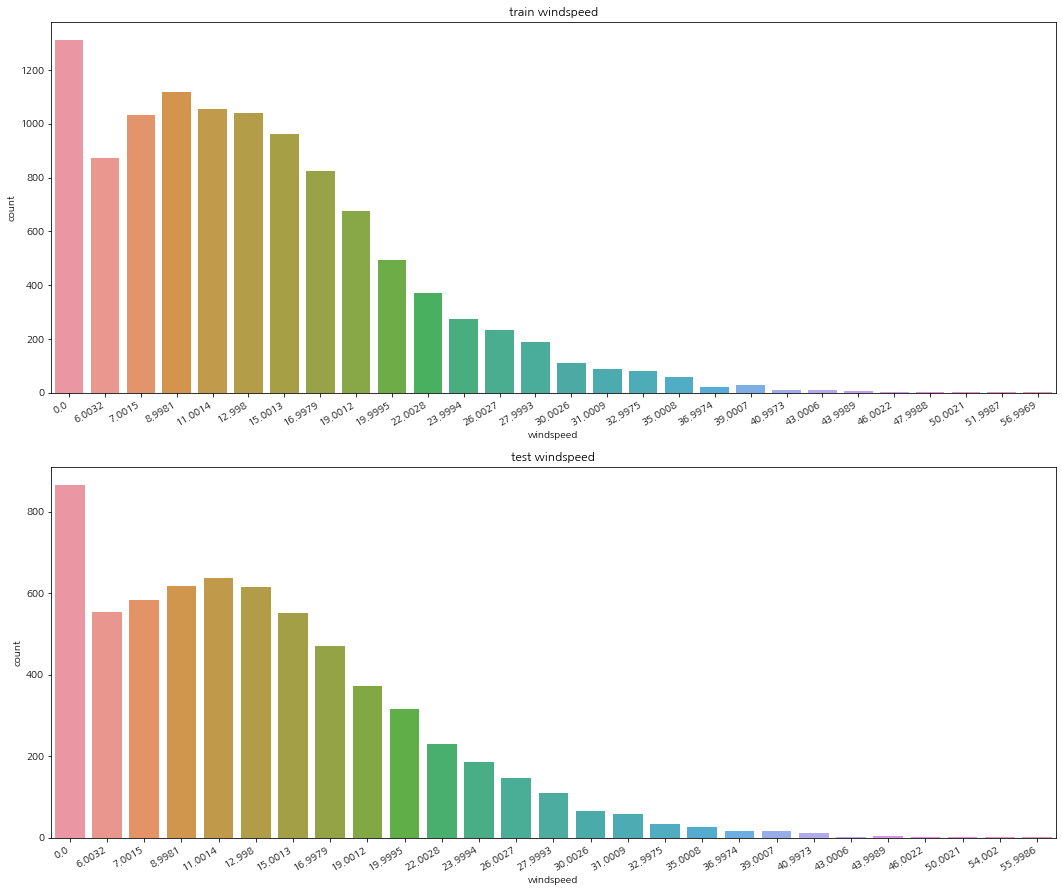

In [30]:
# widspeed 풍속에 0 값이 가장 많다. => 잘못 기록된 데이터를 고쳐 줄 필요가 있음
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,15)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])

In [31]:
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


In [32]:
# 그래서 머신러닝으로 예측을 해서 풍속을 넣어주도록 한다.
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dataWind0 = train.loc[train['windspeed'] == 0]
    dataWindNot0 = train.loc[train['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택한다.
    wCol = ["season","weather","humidity","month","temp","year","atemp"]
        
    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    
    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()
    
    # 학습한 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
    
    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
    
    # 값을 다 예측 후 비교해 보기위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values
    
    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)
    
    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

<AxesSubplot:title={'center':'train windspeed'}, xlabel='windspeed', ylabel='count'>

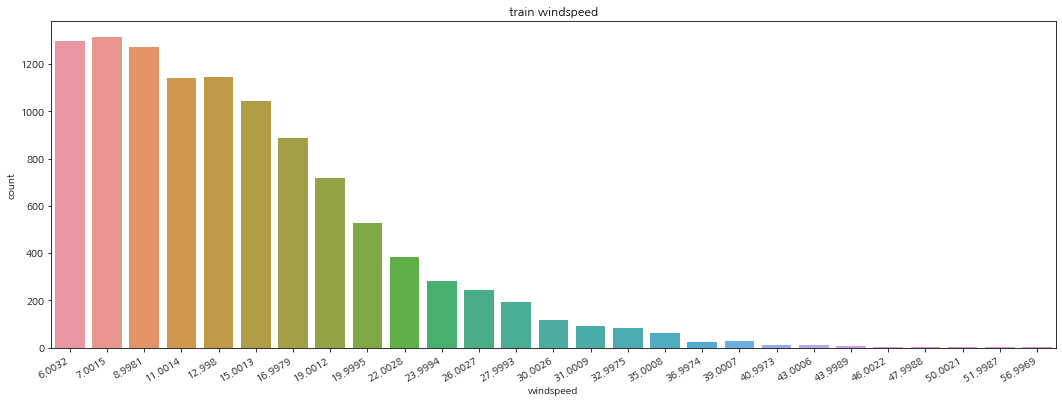

In [33]:
# 0값을 조정한다.
train = predict_windspeed(train)

# widspeed 의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right') # rotation = 30 돌리다. x값 글씨를
ax1.set(ylabel='Count', title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax1)

## Feature Selection
- 신호와 잡음을 구분해야한다.
- 피처가 많다고 해서 무조건 좋은 성능을 내지 않는다.
- 피처를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 피처는 제거하도록 한다.

범주형 피처를 구분해서 카테고리 타입으로 바꿔주도록 하자.

In [34]:
# 연속형 feature와 범주형 feature
# 연속형 teature = ["temp","humidity","windspeed","atemp"]
# 범주형 feature의 type을 category로 변경 해준다.
categorical_feature_names = ["season","holiday","workingday","weather","dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [35]:
feature_names = ["season","weather","temp","atemp","humidity","windspeed","year","hour","dayofweek","workingday"]
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'workingday']

선택된 피처로 X_train,X_test 데이터셋 새로운 행렬을 만들어 주자.

In [36]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 10)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0


In [37]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 10)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,1


In [38]:
label_name = "count"
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

## Score(평가) 
- RMSLE 케글 평가 지표
- 과대평가 된 항목보다는 과소평가 된 항목에 페널티를 준다.

- 오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root)으로 값이 작을수록 정밀도가 높다.

- 0에 가까운 값이 나올수록 정밀도가 높은 값이다.

- Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE)

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcMpUzP%2FbtqwHdHbYW2%2FhEC2CA3HqqvNl0hrcNBkl1%2Fimg.png)

In [39]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict = log_actual) ** 2 
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 추트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## Cross Validation 교차 검증
- 일반화 성능을 측정하기 위해 데이터를 여러 번 반복해서 나누고 여러 모델을 학습한다.
![교차검증](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbkdnwQ%2FbtqCIDVFH14%2FVCKjIli1V1KWCb90VKtzBK%2Fimg.png)

이미지 출처 : [교차검증](https://bskyvision.com/720)
- KFold 교차검증
    - 데이터를 폴드라 부르는 비슷한 크기의 부분집합(n_splits)으로 나누고 각각의 폴드 정확도를 측정한다.
    - 첫 번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련세트로 사용하여 학습한다.
    - 나머지 훈련세트로 만들어진 세트의 정확도를 첫 번째 폴드로 평가한다.
    - 다음은 두 번째 폴드가 테스트 세트가 되고 나머지 폴드의 훈련세트를 두 번째 폴드로 정확도를 측정한다.
    - 이 과정을 마지막 폴드까지 반복한다.
    - 이렇게 훈련세트와 테스트세트로 나누는 N개의 분할마다 정확도를 측정하여 평균 값을 낸게 정확도가 된다.

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## RandomForest
- 정의 : 랜덤 포레스트는 다수의 결정 트리들을 학습하는 앙상블 방법이다. 랜덤 포레스트는 검출, 분류, 그리고 회귀 등 다양한 문제에 활용되고 있다.

![RandomForest](https://upload.wikimedia.org/wikipedia/commons/3/36/%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8_%ED%95%99%EC%8A%B5%EA%B3%BC%EC%A0%95_%EB%B0%B0%EA%B9%85.png)

출처 : [위키백과](https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)

- 기계 학습에서의 랜덤 포레스트(영어: random forest)는 분류, 회귀 분석 등에 사용되는 앙상블 학습 방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 부류(분류) 또는 평균 예측치(회귀 분석)를 출력함으로써 동작한다.

In [41]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(n_jobs=-1, random_state=0)

n_estimators=100 값을 높이면 더 좋은 성능을 낼수있다. 100이상으로 두면 시간이 오래걸려 일단 100으로 설정해주었다.

In [42]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 1.92 s, sys: 2.22 s, total: 4.14 s
Wall time: 7.86 s
Score= 0.33113


## Train

In [43]:
# 학습시킨, 피팅(옷을 맞출 때 사용하는 피팅을 생각합) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [44]:
#예측
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 12.27,   5.14,   3.98,   3.39,   3.13,   6.3 ,  38.4 , 105.98,
       235.16, 136.02])

# 예측한 데이터를 시각화 해본다.


[Text(0.5, 1.0, 'test')]

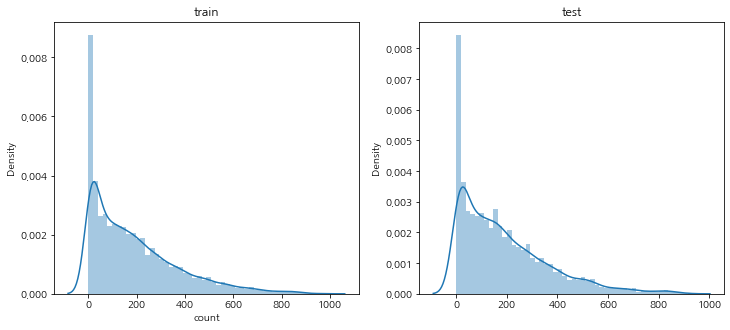

In [45]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

# 5. Submit

submission 파일을 가져오자.

In [46]:
submission = pd.read_csv("data/sampleSubmission.csv")
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [47]:
submission["count"] = predictions

submission의 count에 predictions를 넣어주자.

In [48]:
submission.shape

(6493, 2)

In [49]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,12.27
1,2011-01-20 01:00:00,5.14
2,2011-01-20 02:00:00,3.98
3,2011-01-20 03:00:00,3.39
4,2011-01-20 04:00:00,3.13


In [50]:
submission.to_csv("data/Score_{0:.5f}_submission.csv".format(score), index=False)

파일을 저장후 제출해보도록 하자.

출처 : [Bike_sharing_demand](https://www.youtube.com/watch?v=Q_MbN-vu_2w&list=RDCMUCLR3sD0KB_dWpvcsrLP0aUg&index=2)